In [1]:
#!pip install nibabel tqdm scikit-image

In [1]:
import os
import sys
import random
import math
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image

from tqdm import tqdm
from skimage.metrics import peak_signal_noise_ratio, structural_similarity
from skimage.io import imread
from skimage.transform import pyramid_reduce, resize
from scipy.ndimage import zoom

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Activation, Conv2D, Flatten, Dense, MaxPooling2D, Dropout, Add, LeakyReLU, UpSampling2D, Conv2DTranspose, Concatenate, BatchNormalization
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import SGD

import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor
from torch.autograd import Variable


from tensorflow.python.client import device_lib

In [2]:
#GPU 확인
print(tf.config.list_physical_devices('GPU'))
print(device_lib.list_local_devices())
tf.test.is_gpu_available()

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14262631334647840374
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 2914163099
locality {
  bus_id: 1
  links {
  }
}
incarnation: 4269048582752390772
physical_device_desc: "device: 0, name: GeForce GTX 1050, pci bus id: 0000:01:00.0, compute capability: 6.1"
]
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [3]:
def preprocess(img_name):
    img_path = path

In [4]:
def img_resize(img) :
    image = resize(image, output_shape=(256, 256, 1), preserve_range=True)
    
    return img

In [2]:
#데이터 셋 가져오기
def get_mask_data():

    x_train_path = "dataset/Image_Segmentation/x_train2.npy"
    x_val_path = "dataset/Image_Segmentation/x_val2.npy" 
    y_train_path = "dataset/Image_Segmentation/y_train2.npy"
    y_val_path = "dataset/Image_Segmentation/y_val2.npy"
    
    x_train = np.load(x_train_path)
    x_val = np.load(x_val_path)
    y_train = np.load(y_train_path)
    y_val = np.load(y_val_path)

    print(x_train.shape, y_train.shape)
    print(x_val.shape, y_val.shape)
    
        
    return x_train, y_train, x_val, y_val


In [6]:
# x_train, y_train, x_val, y_val = get_mask_data()
# max_num = 0
# for i, image in enumerate(x_val) :
#     print(image.max(), image.min())

(2675, 256, 256, 1) (2675, 256, 256, 2)
(298, 256, 256, 1) (298, 256, 256, 2)
1.0 0.09932688
1.0 0.13754046
1.0 0.119398326
1.0 0.15505105
1.0 0.1615063
1.0 0.15696117
1.0 0.0
1.0 0.14282045
1.0 0.0
1.0 0.109436005
1.0 0.15764728
1.0 0.08537939
1.0 0.37384778
1.0 0.0
1.0 0.14674163
1.0 0.0
1.0 0.1016103
1.0 0.19913682
1.0 0.14674233
1.0 0.13277742
1.0 0.14734685
1.0 0.0
1.0 0.18125603
1.0 0.0
1.0 0.08663657
1.0 0.0
1.0 0.14661743
1.0 0.0
1.0 0.047446698
1.0 0.15917501
1.0 0.15481421
1.0 0.0765467
1.0 0.15690568
1.0 0.14206532
1.0 0.0
1.0 0.09309173
1.0 0.102897406
1.0 0.0
1.0 0.116709195
1.0 0.13947347
1.0 0.0
1.0 0.1705113
1.0 0.0
1.0 0.17373231
1.0 0.14664784
1.0 0.0
1.0 0.0
1.0 0.0
1.0 0.18104431
1.0 0.15611726
1.0 0.15648645
1.0 0.15161139
1.0 0.17177814
1.0 0.0
1.0 0.10316077
1.0 0.18522772
1.0 0.09951747
1.0 0.0
1.0 0.14246762
1.0 0.16809386
1.0 0.0
1.0 0.0783172
1.0 0.10555875
1.0 0.0
1.0 0.0
1.0 0.05449316
1.0 0.078995496
1.0 0.17115134
1.0 0.12961474
1.0 0.0
1.0 0.123497814
1.

In [6]:
# print(y_train.shape, y_val.shape)
# print(y_train.dtype)
# y_train2 = np.zeros((2675, 256, 256, 2), dtype=np.uint8)
# y_val2 = np.zeros((298, 256, 256, 2), dtype=np.uint8)
# y_train2[..., 0] = y_train[..., 0]
# y_train2[..., 1] = 1 - y_train[..., 0]
# y_val2[..., 0] = y_val[..., 0]
# y_val2[..., 1] = 1-y_val[..., 0]
# # y_train2 = np.zeros(2675)

In [7]:

# max_num = 0
# for i, image in enumerate(x_train) :
#     max_num = np.max(x_train[i])
#     if(np.abs(x_train[i].min()) > max_num) :
#         max_num = np.abs(x_train[i].min())
#     x_train[i] = x_train[i] / max_num
#     if(np.min(x_train[i]) < 0) :
#         x_train[i] = x_train[i] + 1
#         x_train[i] = x_train[i] / 2
#     print('Number : ', i ,' min :', x_train[i].min(),'max : ' ,x_train[i].max())
    
# max_num = 0
# for i, image in enumerate(x_val) :
#     max_num = np.max(x_val[i])
#     if(np.abs(x_val[i].min()) > max_num) :
#         max_num = np.abs(x_train[i].min())
#     x_val[i] = x_val[i] / max_num
#     if(np.min(x_val[i]) < 0) :
#         x_val[i] = x_val[i] + 1
#         x_val[i] = x_val[i] / 2
#     print('Val_Number : ', i ,' min :', x_train[i].min(),'max : ' ,x_train[i].max())


In [3]:
# CNN 인 VGG16 U-net
def VGG16_Unet(x_train, y_train, x_val, y_val) :
  
    inputs = Input(shape=(256, 256, 1))

    #down sampling 
    filters = 16       #feature map 수
    kernel_size = 3    # kernel size
    copy_layers = []   # Encoder에 있는 Activation map을 저장하는 리스트
    net = inputs
  
    #Encoder1
    net = Conv2D(filters, kernel_size, activation='relu', padding='same') (net)
    net = Conv2D(filters, kernel_size, activation='relu', padding='same') (net)
    net = BatchNormalization() (net)
    copy_layers.append(net) #첫번째 Activation map 저장
    net = MaxPooling2D((2, 2), strides=(2, 2)) (net)
    filters = filters*2
    
    #Encoder2 
    net = Conv2D(filters, kernel_size, activation='relu', padding='same') (net)
    net = Conv2D(filters, kernel_size, activation='relu', padding='same') (net)
    net = BatchNormalization() (net)
    copy_layers.append(net) #두번째 Activation map 저장
    net = MaxPooling2D((2, 2), strides=(2, 2)) (net)
    filters = filters*2
    
    #Encoder3
    net = Conv2D(filters, kernel_size, activation='relu', padding='same') (net)
    net = Conv2D(filters, kernel_size, activation='relu', padding='same') (net)
    net = Conv2D(filters, kernel_size, activation='relu', padding='same') (net)
    net = BatchNormalization() (net)
    copy_layers.append(net) #세번째 Activation map 저장
    net = MaxPooling2D((2, 2), strides=(2, 2)) (net)
    filters = filters*2
    
    #Encoder4
    net = Conv2D(filters, kernel_size, activation='relu', padding='same') (net)
    net = Conv2D(filters, kernel_size, activation='relu', padding='same') (net)
    net = Conv2D(filters, kernel_size, activation='relu', padding='same') (net)
    net = BatchNormalization() (net)
    copy_layers.append(net) #네번째 Activation map 저장
    net = MaxPooling2D((2, 2), strides=(2, 2)) (net)
    
    #Encoder5
    net = Conv2D(filters, kernel_size, activation='relu', padding='same') (net)
    net = Conv2D(filters, kernel_size, activation='relu', padding='same') (net)
    net = Conv2D(filters, kernel_size, activation='relu', padding='same') (net)
    net = BatchNormalization() (net)
    copy_layers.append(net) #다섯번째 Activation map 저장
    net = MaxPooling2D((2, 2), strides=(2, 2)) (net)
    
    #128
    net = Conv2D(filters, kernel_size, activation='relu', padding='same') (net)
    net = BatchNormalization() (net)
    
    
    #Decoder : upsampling
    j = len(copy_layers) - 1
    net = Conv2DTranspose(filters, 2, strides=(2, 2), padding='same') (net)
    net = Concatenate(axis=3)([net, copy_layers[j]]) #다섯번째 Activation map 
    
    net = Conv2D(filters, kernel_size, activation='relu', padding='same') (net)
    net = Conv2D(filters, kernel_size, activation='relu', padding='same') (net)
    net = Conv2D(filters, kernel_size, activation='relu', padding='same') (net)
    net = BatchNormalization() (net)
    j = j -1 

    net = Conv2DTranspose(filters, 2, strides=(2, 2), padding='same') (net)
    net = Concatenate(axis=3)([net, copy_layers[j]]) #네번째 Activation map
    net = Conv2D(filters, kernel_size, activation='relu', padding='same') (net)
    net = Conv2D(filters, kernel_size, activation='relu', padding='same') (net)
    net = Conv2D(filters, kernel_size, activation='relu', padding='same') (net)
    net = BatchNormalization() (net)

    filters = filters/2
    j = j -1 
    
    net = Conv2DTranspose(filters, 2, strides=(2, 2), padding='same') (net)
    net = Concatenate(axis=3)([net, copy_layers[j]]) #세번째 Activation map
    net = Conv2D(filters, kernel_size, activation='relu', padding='same') (net)
    net = Conv2D(filters, kernel_size, activation='relu', padding='same') (net)
    net = Conv2D(filters, kernel_size, activation='relu', padding='same') (net)
    net = BatchNormalization() (net)

    filters = filters/2
    j = j -1 
    
    net = Conv2DTranspose(filters, 2, strides=(2, 2), padding='same') (net)
    net = Concatenate(axis=3)([net, copy_layers[j]]) #두번째 Activation map
    net = Conv2D(filters, kernel_size, activation='relu', padding='same') (net)
    net = Conv2D(filters, kernel_size, activation='relu', padding='same') (net)
    net = Conv2D(filters, kernel_size, activation='relu', padding='same') (net)
    net = BatchNormalization() (net)
    
    filters = filters/2
    j = j -1 
    
    net = Conv2DTranspose(filters, 2, strides=(2, 2), padding='same') (net)
    net = Concatenate(axis=3)([net, copy_layers[j]]) #첫번째 Activation map
    net = Conv2D(filters, kernel_size, activation='relu', padding='same') (net)
    net = Conv2D(filters, kernel_size, activation='relu', padding='same') (net)
    net = Conv2D(filters, kernel_size, activation='relu', padding='same') (net)
    net = BatchNormalization() (net)
    
    outputs = Conv2D(2, 1, activation='sigmoid') (net)




    model = Model(inputs=inputs, outputs=outputs)

    model.compile(optimizer='rmsprop', loss='binary_crossentropy', 
                  metrics=['acc',tf.keras.metrics.MeanIoU(num_classes=2)])

    model.summary()
    
    
    

    return model

In [ ]:
def Unet(x_train, y_train, x_val, y_val) :
    f = 16
    layers = []
    net = inputs
  
    for i in range(0, 6):
        net = Conv2D(f, 3, activation='relu', padding='same') (net)
        net = Conv2D(f, 3, activation='relu', padding='same') (net)
        layers.append(net)
        net = MaxPooling2D((2, 2), strides=(2, 2)) (net)
        f = f*2
        #512
    ff2 = 256
  
    #bottleneck 
    j = len(layers) - 1
    net = Conv2D(f, 3, activation='relu', padding='same') (net)
    net = Conv2D(f, 3, activation='relu', padding='same') (net)
    net = Conv2DTranspose(ff2, 2, strides=(2, 2), padding='same') (net)
    net = Concatenate(axis=3)([net, layers[j]])
    j = j -1 
  
    #upsampling 
    for i in range(0, 5):
        ff2 = ff2//2
        f = f // 2 
        net = Conv2D(f, 3, activation='relu', padding='same') (net)
        net = Conv2D(f, 3, activation='relu', padding='same') (net)
        print(net.shape)
        net = Conv2DTranspose(ff2, 2, strides=(2, 2), padding='same') (net)
        print(net.shape)
        net = Concatenate(axis=3)([net, layers[j]])
        j = j -1 
    
  
    #classification 
    net = Conv2D(f, 3, activation='relu', padding='same') (net)
    net = Conv2D(f, 3, activation='relu', padding='same') (net)
    outputs = Conv2D(2, 1, activation='sigmoid') (net)


    model = Model(inputs=inputs, outputs=outputs)

    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc', 'mse', tf.keras.metrics.MeanIoU(num_classes=2)])
    model.summary()
    

In [4]:
def training(model,x_train, y_train, x_val, y_val) :
    history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=30, batch_size=16, 
                      callbacks=[ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, verbose=1, mode='auto', min_lr=1e-05)])
    fig, ax = plt.subplots(3, 2, figsize=(10, 7))
    plt.subplots_adjust(left=0.125,bottom=0.1, right=0.9, top=1.5, wspace=0.2, hspace=0.35)

    
    ax[0, 0].set_title('loss')
    ax[0, 0].plot(history.history['loss'], 'r')
    ax[0, 1].set_title('acc')
    ax[0, 1].plot(history.history['acc'], 'b')

    ax[1, 0].set_title('val_loss')
    ax[1, 0].plot(history.history['val_loss'], 'r--')
    ax[1, 1].set_title('val_acc')
    ax[1, 1].plot(history.history['val_acc'], 'b--')
    
    ax[2,0].set_title('MeanIoU')
    ax[2,0].plot(history.history['mean_io_u'], 'r')
    ax[2,1].set_title('val_MeanIoU')
    ax[2,1].plot(history.history['val_mean_io_u'], 'r')
    

    preds = model.predict(x_val)
    fig, ax = plt.subplots(40, 4, figsize=(10, 100))
    
    temp = np.empty((256, 256, 1), dtype=np.float32)

    for i in range(40):
        ax[i, 0].imshow(x_val[i].squeeze(), cmap='gray')
        ax[i, 0].title.set_text(str(i))
    
        y_val_0 = y_val[...,0]
        ax[i, 1].imshow(y_val_0[i].squeeze(), cmap='gray')
    
        predict_0 = preds[...,0]
        ax[i, 2].imshow(predict_0[i].squeeze(), cmap='gray')
    
        temp = x_val[i]
        pred_sum = predict_0[i][predict_0[i] > 0]
        pred_mean = np.mean(predict_0)
        if(np.min(temp) >= 0) :
            temp[predict_0[i] < 0.5] = 0
        else :
            temp[predict_0[i] < 0.5] = -2048
        ax[i, 3].imshow(temp.squeeze(), cmap='gray')


In [8]:
x_train, y_train, x_val, y_val = get_mask_data()
print(y_train.max(), y_train.min())
print(x_train.max(), x_train.min())
print(x_val.max(), x_val.min())
# model = VGG16_Unet(x_train, y_train2, x_val, y_val2)
# history = training(model,x_train, y_train2, x_val, y_val2)

(2675, 256, 256, 1) (2675, 256, 256, 2)
(298, 256, 256, 1) (298, 256, 256, 2)
1 0
1.0 0.0
1.0 0.0


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 16) 160         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 16) 2320        conv2d[0][0]                     
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 256, 256, 16) 64          conv2d_1[0][0]                   
______________________________________________________________________________________________

Epoch 1/30
168/168 [==============================] - 100s 499ms/step - loss: 0.2881 - acc: 0.9334 - mean_io_u: 0.2501 - val_loss: 0.4367 - val_acc: 0.8674 - val_mean_io_u: 0.2500
Epoch 2/30
168/168 [==============================] - 78s 466ms/step - loss: 0.0571 - acc: 0.9909 - mean_io_u: 0.2635 - val_loss: 0.5299 - val_acc: 0.8876 - val_mean_io_u: 0.2500
Epoch 3/30
168/168 [==============================] - 78s 465ms/step - loss: 0.0293 - acc: 0.9920 - mean_io_u: 0.2816 - val_loss: 0.0894 - val_acc: 0.9744 - val_mean_io_u: 0.2621
Epoch 4/30
168/168 [==============================] - 78s 465ms/step - loss: 0.0169 - acc: 0.9944 - mean_io_u: 0.2920 - val_loss: 0.2209 - val_acc: 0.9582 - val_mean_io_u: 0.2879
Epoch 5/30
168/168 [==============================] - 78s 465ms/step - loss: 0.0159 - acc: 0.9947 - mean_io_u: 0.2890 - val_loss: 0.0234 - val_acc: 0.9926 - val_mean_io_u: 0.3071
Epoch 6/30
168/168 [==============================] - 78s 466ms/step - loss: 0.0132 - acc: 0.9952 - mean

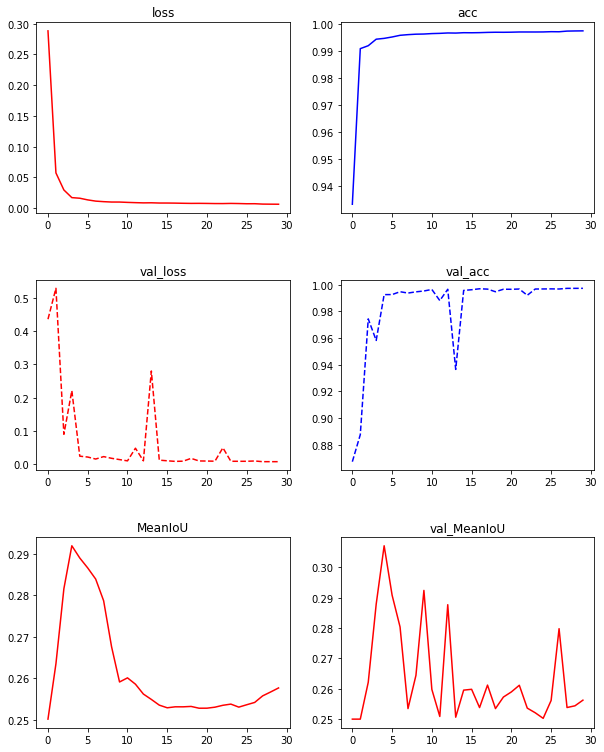

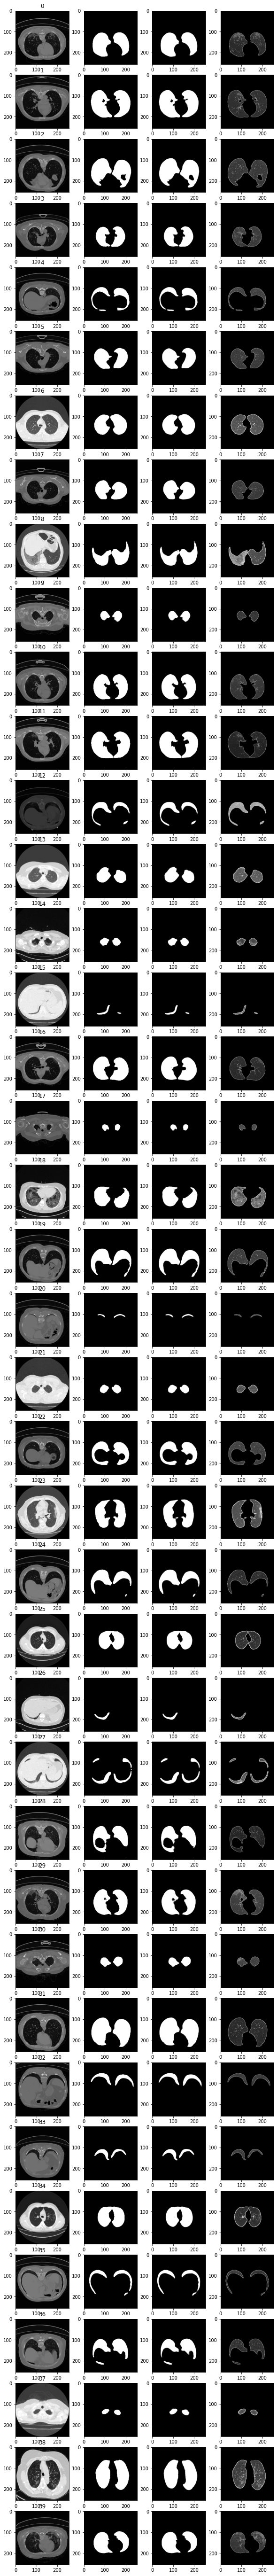

In [6]:
model = VGG16_Unet(x_train, y_train, x_val, y_val)
history = training(model,x_train, y_train, x_val, y_val)

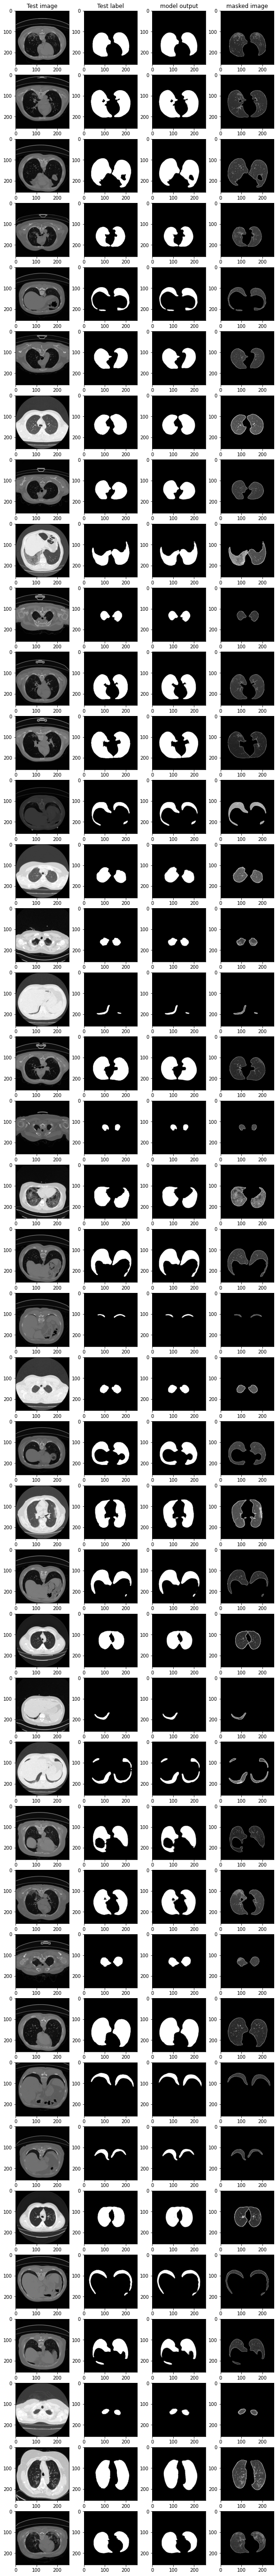

In [9]:
preds = model.predict(x_val)
fig, ax = plt.subplots(40, 4, figsize=(10, 100))
    
temp = np.empty((256, 256, 1), dtype=np.float32)

ax[0, 0].title.set_text("Test image")
ax[0, 1].title.set_text("Test label")
ax[0, 2].title.set_text("model output")
ax[0, 3].title.set_text("masked image")
for i in range(40):
    ax[i, 0].imshow(x_val[i].squeeze(), cmap='gray')
    
    y_val_0 = y_val[...,0]
    ax[i, 1].imshow(y_val_0[i].squeeze(), cmap='gray')
    
    predict_0 = preds[...,0]
    ax[i, 2].imshow(predict_0[i].squeeze(), cmap='gray')
    
    temp = x_val[i]
    pred_sum = predict_0[i][predict_0[i] > 0]
    pred_mean = np.mean(predict_0)
    temp[predict_0[i] < 0.5] = 0
    ax[i, 3].imshow(temp.squeeze(), cmap='gray')
    

In [11]:
y_val_com_0 = y_val[...,0] #image label 
predict_com_0 = preds[...,0] #prediction (model output)

IOU_SUM = 0.0
IOU_AVE = 0.0
Number_image =0

for n,_ in enumerate(y_val_com_0) :
    
    TP = 0
    NP = 0
    index = n
    
    y_label_image = y_val_com_0[index].copy()
    predict_image = predict_com_0[index].copy()

    #model output 0번째 사진의 각 픽셀에 0.5보다 작으면 0 크면 1
    predict_image[predict_image < 0.5] = 0 
    predict_image[predict_image > 0.5] = 1

    #비교 해서 같으면 TP+1 아니면 NP+1
    for i in range(256) :
        for j in range(256) :
            if(y_label_image[i][j] == predict_image[i][j]) :
                TP = TP + 1
            else :
                NP = NP + 1

    print('Number : ', n, 'TP :', TP,'NP : ', NP)
    print('IOU :', TP/ (TP + NP) , '\n')
    IOU_SUM = TP/ (TP + NP) + IOU_SUM
    Number_image = n
    
IOU_AVE = IOU_SUM / (Number_image +  1)
print("IOU_AVE : ", IOU_AVE)


Number :  0 TP : 65375 NP :  161
IOU : 0.9975433349609375 

Number :  1 TP : 65389 NP :  147
IOU : 0.9977569580078125 

Number :  2 TP : 65182 NP :  354
IOU : 0.994598388671875 

Number :  3 TP : 65392 NP :  144
IOU : 0.997802734375 

Number :  4 TP : 65435 NP :  101
IOU : 0.9984588623046875 

Number :  5 TP : 65417 NP :  119
IOU : 0.9981842041015625 

Number :  6 TP : 65440 NP :  96
IOU : 0.99853515625 

Number :  7 TP : 65458 NP :  78
IOU : 0.998809814453125 

Number :  8 TP : 65271 NP :  265
IOU : 0.9959564208984375 

Number :  9 TP : 65477 NP :  59
IOU : 0.9990997314453125 

Number :  10 TP : 65425 NP :  111
IOU : 0.9983062744140625 

Number :  11 TP : 65262 NP :  274
IOU : 0.995819091796875 

Number :  12 TP : 65341 NP :  195
IOU : 0.9970245361328125 

Number :  13 TP : 65411 NP :  125
IOU : 0.9980926513671875 

Number :  14 TP : 65400 NP :  136
IOU : 0.9979248046875 

Number :  15 TP : 65492 NP :  44
IOU : 0.99932861328125 

Number :  16 TP : 65400 NP :  136
IOU : 0.9979248046875

Number :  137 TP : 65483 NP :  53
IOU : 0.9991912841796875 

Number :  138 TP : 65522 NP :  14
IOU : 0.999786376953125 

Number :  139 TP : 65475 NP :  61
IOU : 0.9990692138671875 

Number :  140 TP : 65270 NP :  266
IOU : 0.995941162109375 

Number :  141 TP : 65279 NP :  257
IOU : 0.9960784912109375 

Number :  142 TP : 65468 NP :  68
IOU : 0.99896240234375 

Number :  143 TP : 65217 NP :  319
IOU : 0.9951324462890625 

Number :  144 TP : 65307 NP :  229
IOU : 0.9965057373046875 

Number :  145 TP : 65435 NP :  101
IOU : 0.9984588623046875 

Number :  146 TP : 65297 NP :  239
IOU : 0.9963531494140625 

Number :  147 TP : 65281 NP :  255
IOU : 0.9961090087890625 

Number :  148 TP : 65452 NP :  84
IOU : 0.99871826171875 

Number :  149 TP : 65511 NP :  25
IOU : 0.9996185302734375 

Number :  150 TP : 65309 NP :  227
IOU : 0.9965362548828125 

Number :  151 TP : 65409 NP :  127
IOU : 0.9980621337890625 

Number :  152 TP : 65411 NP :  125
IOU : 0.9980926513671875 

Number :  153 TP : 6

Number :  273 TP : 65364 NP :  172
IOU : 0.99737548828125 

Number :  274 TP : 65472 NP :  64
IOU : 0.9990234375 

Number :  275 TP : 65379 NP :  157
IOU : 0.9976043701171875 

Number :  276 TP : 65437 NP :  99
IOU : 0.9984893798828125 

Number :  277 TP : 65448 NP :  88
IOU : 0.9986572265625 

Number :  278 TP : 65302 NP :  234
IOU : 0.996429443359375 

Number :  279 TP : 65410 NP :  126
IOU : 0.998077392578125 

Number :  280 TP : 65432 NP :  104
IOU : 0.9984130859375 

Number :  281 TP : 65165 NP :  371
IOU : 0.9943389892578125 

Number :  282 TP : 65321 NP :  215
IOU : 0.9967193603515625 

Number :  283 TP : 65308 NP :  228
IOU : 0.99652099609375 

Number :  284 TP : 65318 NP :  218
IOU : 0.996673583984375 

Number :  285 TP : 65175 NP :  361
IOU : 0.9944915771484375 

Number :  286 TP : 65327 NP :  209
IOU : 0.9968109130859375 

Number :  287 TP : 65310 NP :  226
IOU : 0.996551513671875 

Number :  288 TP : 65036 NP :  500
IOU : 0.99237060546875 

Number :  289 TP : 65288 NP :  24

In [27]:
def get_mask_data00():

    x_train_path = "dataset/Infection/x_train.npy"
    x_val_path = "dataset/Infection/x_val.npy"
    x_test_path = "dataset/Infection/x_test.npy"
    
    x_train = np.load(x_train_path)
    x_val = np.load(x_val_path)
    x_test = np.load(x_test_path)
    
    print(x_train.shape, x_train.min(), x_train.max())
    print(x_val.shape, x_val.min(), x_val.max())
    print(x_test.shape, x_test.min(), x_test.max())
    
        
    return x_train, x_val, x_test


In [35]:
prdict_infect_train = model.predict(x_train)
prdict_infect_val = model.predict(x_val)
prdict_infect_test = model.predict(x_test)

prdict_infect_train_0 = prdict_infect_train[..., 0]
prdict_infect_val_0 = prdict_infect_val[..., 0]
prdict_infect_test_0 = prdict_infect_test[..., 0]


for i, img in enumerate(x_train) : 
    img[prdict_infect_train_0[i] < 0.5] = 0
    
for i, img in enumerate(x_val) : 
    img[prdict_infect_val_0[i] < 0.5] = 0
    
for i, img in enumerate(x_test) : 
    img[prdict_infect_test_0[i] < 0.5] = 0

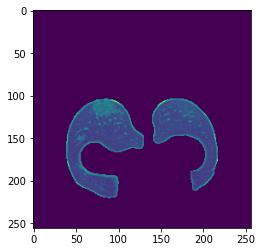

In [44]:
np.save("dataset/Infection/mask_infection.npy", x_train)
np.save("dataset/Infection/mask_infection_val.npy", x_val)
np.save("dataset/Infection/mask_infection_test.npy", x_test)

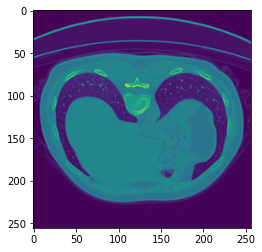

In [34]:
model.pridict

In [29]:
# max_num = 0
# for i, image in enumerate(x_train) :
#     max_num = np.max(x_train[i])
#     if(np.abs(x_train[i].min()) > max_num) :
#         max_num = np.abs(x_train[i].min())
#     x_train[i] = x_train[i] / max_num
#     if(np.min(x_train[i]) < 0) :
#         x_train[i] = x_train[i] + 1
#         x_train[i] = x_train[i] / 2
#     print('Number : ', i ,' min :', x_train[i].min(),'max : ' ,x_train[i].max())
    
# max_num = 0
# for i, image in enumerate(x_val) :
#     max_num = np.max(x_val[i])
#     if(np.abs(x_val[i].min()) > max_num) :
#         max_num = np.abs(x_val[i].min())
#     x_val[i] = x_val[i] / max_num
#     if(np.min(x_val[i]) < 0) :
#         x_val[i] = x_val[i] + 1
#         x_val[i] = x_val[i] / 2
#     print('Val_Number : ', i ,' min :', x_val[i].min(),'max : ' ,x_val[i].max())

# max_num = 0
# for i, image in enumerate(x_test) :
#     max_num = np.max(x_test[i])
#     if(np.abs(x_test[i].min()) > max_num) :
#         max_num = np.abs(x_test[i].min())
#     x_test[i] = x_test[i] / max_num
#     if(np.min(x_test[i]) < 0) :
#         x_test[i] = x_test[i] + 1
#         x_test[i] = x_test[i] / 2
#     print('Test_Number : ', i ,' min :', x_test[i].min(),'max : ' ,x_test[i].max())

Number :  0  min : 0.15575913 max :  1.0
Number :  1  min : 0.16189829 max :  1.0
Number :  2  min : 0.11484623 max :  1.0
Number :  3  min : 0.0 max :  1.0
Number :  4  min : 0.09402609 max :  1.0
Number :  5  min : 0.09585965 max :  1.0
Number :  6  min : 0.085439116 max :  1.0
Number :  7  min : 0.13519394 max :  1.0
Number :  8  min : 0.0 max :  1.0
Number :  9  min : 0.1793985 max :  1.0
Number :  10  min : 0.145428 max :  1.0
Number :  11  min : 0.06361303 max :  1.0
Number :  12  min : 0.12668097 max :  1.0
Number :  13  min : 0.11923018 max :  1.0
Number :  14  min : 0.109370045 max :  1.0
Number :  15  min : 0.11114508 max :  1.0
Number :  16  min : 0.12929249 max :  1.0
Number :  17  min : 0.1578303 max :  1.0
Number :  18  min : 0.0 max :  1.0
Number :  19  min : 0.3832733 max :  1.0
Number :  20  min : 0.14206532 max :  1.0
Number :  21  min : 0.16569352 max :  1.0
Number :  22  min : 0.12394893 max :  1.0
Number :  23  min : 0.15891087 max :  1.0
Number :  24  min : 0.0 ma

Number :  269  min : 0.09578776 max :  1.0
Number :  270  min : 0.0 max :  1.0
Number :  271  min : 0.1627562 max :  1.0
Number :  272  min : 0.088370785 max :  1.0
Number :  273  min : 0.0 max :  1.0
Number :  274  min : 0.15641496 max :  1.0
Number :  275  min : 0.16983879 max :  1.0
Number :  276  min : 0.0 max :  1.0
Number :  277  min : 0.0 max :  1.0
Number :  278  min : 0.0 max :  1.0
Number :  279  min : 0.1325036 max :  1.0
Number :  280  min : 0.1560058 max :  1.0
Number :  281  min : 0.1728738 max :  1.0
Number :  282  min : 0.14680286 max :  1.0
Number :  283  min : 0.17447022 max :  1.0
Number :  284  min : 0.074448735 max :  1.0
Number :  285  min : 0.398508 max :  1.0
Number :  286  min : 0.12910679 max :  1.0
Number :  287  min : 0.1016103 max :  1.0
Number :  288  min : 0.13143101 max :  1.0
Number :  289  min : 0.1375466 max :  1.0
Number :  290  min : 0.15639031 max :  1.0
Number :  291  min : 0.0 max :  1.0
Number :  292  min : 0.089823835 max :  1.0
Number :  293  

Number :  572  min : 0.100605845 max :  1.0
Number :  573  min : 0.19053927 max :  1.0
Number :  574  min : 0.17346936 max :  1.0
Number :  575  min : 0.14185935 max :  1.0
Number :  576  min : 0.15911916 max :  1.0
Number :  577  min : 0.16928801 max :  1.0
Number :  578  min : 0.14141506 max :  1.0
Number :  579  min : 0.17293555 max :  1.0
Number :  580  min : 0.0 max :  1.0
Number :  581  min : 0.16176188 max :  1.0
Number :  582  min : 0.17935097 max :  1.0
Number :  583  min : 0.15233627 max :  1.0
Number :  584  min : 0.0 max :  1.0
Number :  585  min : 0.0 max :  1.0
Number :  586  min : 0.12961474 max :  1.0
Number :  587  min : 0.18252248 max :  1.0
Number :  588  min : 0.032647997 max :  1.0
Number :  589  min : 0.17138243 max :  1.0
Number :  590  min : 0.1451607 max :  1.0
Number :  591  min : 0.09850523 max :  1.0
Number :  592  min : 0.09927878 max :  1.0
Number :  593  min : 0.17185885 max :  1.0
Number :  594  min : 0.0 max :  1.0
Number :  595  min : 0.20409721 max : 

Number :  932  min : 0.19360346 max :  1.0
Number :  933  min : 0.16230485 max :  1.0
Number :  934  min : 0.09253937 max :  1.0
Number :  935  min : 0.1018236 max :  1.0
Number :  936  min : 0.11216852 max :  1.0
Number :  937  min : 0.1495538 max :  1.0
Number :  938  min : 0.1786372 max :  1.0
Number :  939  min : 0.0 max :  1.0
Number :  940  min : 0.123487204 max :  1.0
Number :  941  min : 0.077977985 max :  1.0
Number :  942  min : 0.12578198 max :  1.0
Number :  943  min : 0.102330506 max :  1.0
Number :  944  min : 0.16230917 max :  1.0
Number :  945  min : 0.13203159 max :  1.0
Number :  946  min : 0.027105331 max :  1.0
Number :  947  min : 0.18280038 max :  1.0
Number :  948  min : 0.14922845 max :  1.0
Number :  949  min : 0.13588324 max :  1.0
Number :  950  min : 0.16443941 max :  1.0
Number :  951  min : 0.12787789 max :  1.0
Number :  952  min : 0.18240055 max :  1.0
Number :  953  min : 0.0 max :  1.0
Number :  954  min : 0.16000059 max :  1.0
Number :  955  min : 0.1

Number :  1126  min : 0.1824505 max :  1.0
Number :  1127  min : 0.0 max :  0.98362553
Number :  1128  min : 0.0 max :  1.0
Number :  1129  min : 0.17620131 max :  1.0
Number :  1130  min : 0.16255203 max :  1.0
Number :  1131  min : 0.1615063 max :  1.0
Number :  1132  min : 0.0 max :  1.0
Number :  1133  min : 0.1278187 max :  1.0
Number :  1134  min : 0.06857355 max :  1.0
Number :  1135  min : 0.11386353 max :  1.0
Number :  1136  min : 0.21314898 max :  1.0
Number :  1137  min : 0.0 max :  1.0
Number :  1138  min : 0.17959464 max :  1.0
Number :  1139  min : 0.12505803 max :  1.0
Number :  1140  min : 0.0 max :  1.0
Number :  1141  min : 0.14114174 max :  1.0
Number :  1142  min : 0.13877091 max :  1.0
Number :  1143  min : 0.18788406 max :  1.0
Number :  1144  min : 0.13445619 max :  1.0
Number :  1145  min : 0.08663657 max :  1.0
Number :  1146  min : 0.0 max :  1.0
Number :  1147  min : 0.17070347 max :  1.0
Number :  1148  min : 0.16628593 max :  1.0
Number :  1149  min : 0.09

Number :  1333  min : 0.15513241 max :  1.0
Number :  1334  min : 0.0 max :  1.0
Number :  1335  min : 0.16747281 max :  1.0
Number :  1336  min : 0.11125371 max :  1.0
Number :  1337  min : 0.101252586 max :  1.0
Number :  1338  min : 0.17999747 max :  1.0
Number :  1339  min : 0.0 max :  1.0
Number :  1340  min : 0.099562325 max :  1.0
Number :  1341  min : 0.114441186 max :  1.0
Number :  1342  min : 0.09451163 max :  1.0
Number :  1343  min : 0.17044854 max :  1.0
Number :  1344  min : 0.14595494 max :  1.0
Number :  1345  min : 0.16721052 max :  1.0
Number :  1346  min : 0.120808184 max :  1.0
Number :  1347  min : 0.0 max :  1.0
Number :  1348  min : 0.0 max :  1.0
Number :  1349  min : 0.14663109 max :  1.0
Number :  1350  min : 0.111032486 max :  1.0
Number :  1351  min : 0.14248419 max :  1.0
Number :  1352  min : 0.0 max :  1.0
Number :  1353  min : 0.14606813 max :  1.0
Number :  1354  min : 0.0 max :  1.0
Number :  1355  min : 0.07553214 max :  1.0
Number :  1356  min : 0.1

Number :  1716  min : 0.15250903 max :  1.0
Number :  1717  min : 0.078336984 max :  1.0
Number :  1718  min : 0.15675965 max :  1.0
Number :  1719  min : 0.15023693 max :  1.0
Number :  1720  min : 0.14385545 max :  1.0
Number :  1721  min : 0.12073684 max :  1.0
Number :  1722  min : 0.14107198 max :  1.0
Number :  1723  min : 0.0 max :  1.0
Number :  1724  min : 0.10847348 max :  1.0
Number :  1725  min : 0.17177075 max :  1.0
Number :  1726  min : 0.15590549 max :  1.0
Number :  1727  min : 0.15153775 max :  1.0
Number :  1728  min : 0.14689091 max :  1.0
Number :  1729  min : 0.14655626 max :  1.0
Number :  1730  min : 0.15289226 max :  1.0
Number :  1731  min : 0.10714868 max :  1.0
Number :  1732  min : 0.14039588 max :  1.0
Number :  1733  min : 0.12415722 max :  1.0
Number :  1734  min : 0.14509323 max :  1.0
Number :  1735  min : 0.17184246 max :  1.0
Number :  1736  min : 0.0 max :  1.0
Number :  1737  min : 0.15370482 max :  1.0
Number :  1738  min : 0.10040784 max :  1.0
N

Number :  1911  min : 0.14674163 max :  1.0
Number :  1912  min : 0.0 max :  1.0
Number :  1913  min : 0.032043517 max :  1.0
Number :  1914  min : 0.1413543 max :  1.0
Number :  1915  min : 0.09881958 max :  1.0
Number :  1916  min : 0.11340937 max :  1.0
Number :  1917  min : 0.0 max :  1.0
Number :  1918  min : 0.1226719 max :  1.0
Number :  1919  min : 0.0 max :  1.0
Number :  1920  min : 0.1647816 max :  1.0
Number :  1921  min : 0.16810134 max :  1.0
Number :  1922  min : 0.18075848 max :  1.0
Number :  1923  min : 0.0 max :  1.0
Number :  1924  min : 0.14769605 max :  1.0
Number :  1925  min : 0.20682798 max :  1.0
Number :  1926  min : 0.0 max :  1.0
Number :  1927  min : 0.16015306 max :  1.0
Number :  1928  min : 0.0 max :  1.0
Number :  1929  min : 0.17213836 max :  1.0
Number :  1930  min : 0.09540507 max :  1.0
Number :  1931  min : 0.11690557 max :  1.0
Number :  1932  min : 0.1763879 max :  1.0
Number :  1933  min : 0.07830158 max :  1.0
Number :  1934  min : 0.0 max :  

Number :  2105  min : 0.0 max :  1.0
Number :  2106  min : 0.07326666 max :  1.0
Number :  2107  min : 0.17757559 max :  1.0
Number :  2108  min : 0.16555837 max :  1.0
Number :  2109  min : 0.17206618 max :  1.0
Number :  2110  min : 0.14101863 max :  1.0
Number :  2111  min : 0.06372309 max :  1.0
Number :  2112  min : 0.116138786 max :  1.0
Number :  2113  min : 0.09745812 max :  1.0
Number :  2114  min : 0.16098073 max :  1.0
Number :  2115  min : 0.1642226 max :  1.0
Number :  2116  min : 0.13085017 max :  1.0
Number :  2117  min : 0.3376107 max :  1.0
Number :  2118  min : 0.13891011 max :  1.0
Number :  2119  min : 0.0748176 max :  1.0
Number :  2120  min : 0.13916573 max :  1.0
Number :  2121  min : 0.16801345 max :  1.0
Number :  2122  min : 0.17373231 max :  1.0
Number :  2123  min : 0.14610434 max :  1.0
Number :  2124  min : 0.0 max :  1.0
Number :  2125  min : 0.26400638 max :  1.0
Number :  2126  min : 0.11550018 max :  1.0
Number :  2127  min : 0.16465062 max :  1.0
Numb

Number :  2308  min : 0.14194465 max :  1.0
Number :  2309  min : 0.0 max :  1.0
Number :  2310  min : 0.0 max :  1.0
Number :  2311  min : 0.0 max :  1.0
Number :  2312  min : 0.047464877 max :  1.0
Number :  2313  min : 0.3798141 max :  1.0
Number :  2314  min : 0.16880149 max :  1.0
Number :  2315  min : 0.09357399 max :  1.0
Number :  2316  min : 0.18452755 max :  1.0
Number :  2317  min : 0.16936967 max :  1.0
Number :  2318  min : 0.06958118 max :  1.0
Number :  2319  min : 0.17229259 max :  1.0
Number :  2320  min : 0.0 max :  1.0
Number :  2321  min : 0.09892416 max :  1.0
Number :  2322  min : 0.16199648 max :  1.0
Number :  2323  min : 0.17456317 max :  1.0
Number :  2324  min : 0.0 max :  1.0
Number :  2325  min : 0.1705113 max :  1.0
Number :  2326  min : 0.13202661 max :  1.0
Number :  2327  min : 0.1682888 max :  1.0
Number :  2328  min : 0.11840376 max :  1.0
Number :  2329  min : 0.06612632 max :  1.0
Number :  2330  min : 0.075493544 max :  1.0
Number :  2331  min : 0.

Val_Number :  265  min : 0.0 max :  1.0
Val_Number :  266  min : 0.10316077 max :  1.0
Val_Number :  267  min : 0.17730528 max :  1.0
Val_Number :  268  min : 0.0 max :  1.0
Val_Number :  269  min : 0.0 max :  1.0
Val_Number :  270  min : 0.0 max :  1.0
Val_Number :  271  min : 0.0 max :  1.0
Val_Number :  272  min : 0.15136069 max :  1.0
Val_Number :  273  min : 0.0 max :  1.0
Val_Number :  274  min : 0.09632559 max :  1.0
Val_Number :  275  min : 0.099643156 max :  1.0
Val_Number :  276  min : 0.054949373 max :  1.0
Val_Number :  277  min : 0.0 max :  1.0
Val_Number :  278  min : 0.19191477 max :  1.0
Val_Number :  279  min : 0.12194967 max :  1.0
Val_Number :  280  min : 0.13597515 max :  1.0
Val_Number :  281  min : 0.0 max :  1.0
Val_Number :  282  min : 0.14676292 max :  1.0
Val_Number :  283  min : 0.12930903 max :  1.0
Val_Number :  284  min : 0.08609089 max :  1.0
Val_Number :  285  min : 0.16399029 max :  1.0
Val_Number :  286  min : 0.14710866 max :  1.0
Val_Number :  287  m

In [30]:
# np.save('dataset/Infection/x_train.npy', x_train)
# np.save('dataset/Infection/x_val.npy', x_val)
# np.save('dataset/Infection/x_test.npy', x_test)

In [45]:
x_train_again, y_train_again, x_val_again, y_val_again = get_mask_data()

pre = model.predict(x_val_again)

def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()
    

    

(2675, 256, 256, 1) (2675, 256, 256, 2)
(298, 256, 256, 1) (298, 256, 256, 2)


In [35]:
print(pre.shape, y_val_again.shape)

(298, 256, 256, 2) (298, 256, 256, 2)


In [47]:
pre_0 = pre[...,0]
y_val_0 = y_val[...,0]

In [48]:
ground_truth_labels = y_val_0.ravel() # we want to make them into vectors
score_value = pre_0.ravel()

In [49]:
fpr, tpr, _ = roc_curve(ground_truth_labels,score_value)
roc_auc = auc(fpr,tpr)

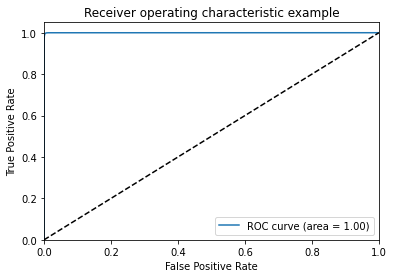

In [42]:
fig, ax = plt.subplots(1,1)
ax.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver operating characteristic example')
ax.legend(loc="lower right")

In [10]:
def get_predict_part(original ,predict) :
    copy_original = original.copy()
    
    for k, pred in enumerate(predict):
        if(np.min(copy_original[k]) >= 0) :
            copy_original[k][pred < 0.5] = 0
        else :
            copy_original[k][pred < 0.5] = -2048
            
    return copy_original

In [11]:
all_data_path= "transe"
original_data_path = "transe/data"
answer_data_path = "transe/transe"

data_set_folder_list = os.listdir(original_data_path)

for i, folder_name in enumerate(data_set_folder_list):
    address  = original_data_path + '/' + folder_name
    folder_video_set = os.listdir(address)
    for j, tar_name in enumerate(folder_video_set) :
        tar_address = address + '/' + tar_name
        raw_img = nib.load(tar_address)
        img_array = np.array(raw_img.get_fdata(), dtype=np.float32)
        images = img_array.T
        img_data = np.empty(( len(images), 256, 256, 1), dtype=np.float32)
        for i, image_array in enumerate(images) :
            img = resize(image_array, output_shape=(256, 256, 1), preserve_range=True)
            img_data[i] = img
        pres = model.predict(img_data)
        
        predict_lung = get_predict_part(img_data ,pres)
        
        
        
        save_address = answer_data_path + "/" + folder_name + "/" + tar_name
        np.save(save_address, predict_lung)



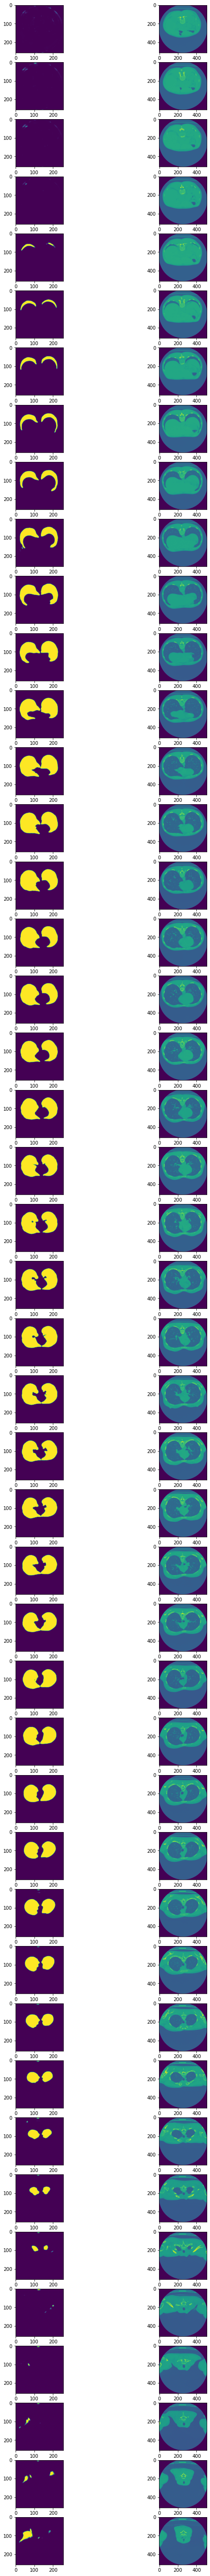

In [55]:
fff = 'study_0234.nii.gz'
sss=nib.load(fff)
img_array = np.array(sss.get_fdata(), dtype=np.float32)
images = img_array.T
img_data = np.empty(( len(images), 256, 256, 1), dtype=np.float32)
for i, image_array in enumerate(images) :
    img = resize(image_array, output_shape=(256, 256, 1), preserve_range=True)
    img_data[i] = img
pres = model.predict(img_data)
pres_0 = pres[...,0]
fig, ax = plt.subplots(len(pres_0), 2, figsize=(10, 100))
    

for i, pr in enumerate(pres_0):
    ax[i,0].imshow(pr.squeeze())
    ax[i,1].imshow(images[i].squeeze())

In [ ]:
# def get_predict_part(original ,predict) :
#     copy_original = original.copy()
    
#     for k, pred in enumerate(predict):
#         pred_sum = pred[pred > 0]
#         pred_mean = np.mean(pred_sum)
#         if(np.min(copy_original[k]) >= 0) :
#             copy_original[k][pred < pred_mean] = 0
#         else :
#             copy_original[k][pred < pred_mean] = -2048
            
#     return copy_original

In [ ]:
covid_path = "transe/COVID-19"
penumonia_path = "transe/non-COVID-19/CP"

covid_list = os.listdir(penumonia_path)
#penumonia_list = os.listdir(penumonia_path)
count = 0


for i, name in enumerate(covid_list) :
    address = penumonia_path + "/" + name
#     os.makedirs("transe/done_non-COVID-19/" + name)
    image_list = os.listdir(address)
    image_set = np.empty((len(image_list), 256, 256, 1), dtype = np.float32)
    for j, image_name in enumerate(image_list):
        image_path = os.path.join(address, image_name)
        img = Image.open(image_path)
        image_array = np.asarray(img)
        image = resize(image_array, output_shape=(256, 256, 1), preserve_range=True)
        image_set[j] = image
    predict = model.predict(image_set)
    
    for i, pred in enumerate(predict):
        pred_sum = pred[pred> 0]
        pred_mean = np.mean(pred_sum)
        if(np.min(image_set[i]) >= 0) :
            image_set[i][pred < pred_mean] = 0
        else :
            image_set[i][pred < pred_mean] = -2048

    
    predict_lung = get_predict_part(image_set ,predict)
    directory_path = "transe/done_non-COVID-19/" + name +"/"+ str(i)
#     fig, ax = plt.subplots(len(predict_lung), 2, figsize=(10, 100))
#     for i, lung in enumerate(predict_lung) :
#         ax[i,0].imshow(image_set[i].squeeze(), cmap='gray')
#         ax[i,1].imshow(lung.squeeze(), cmap='gray')
#     tem = input()
#     if(tem != 'y') : break
    np.save(directory_path, predict_lung)
    




In [ ]:
covid_path = "transe/done_COVID-19"

covid_list = os.listdir(covid_path)
#penumonia_list = os.listdir(penumonia_path)
count = 0

address = "transe/done_COVID-19/" + covid_list[3]
image_list = os.listdir(address)

image_path = os.path.join(address, image_list[0])
img_set = np.load(image_path)

fig, ax = plt.subplots(len(img_set), 1, figsize=(10, 100))
plt.subplots_adjust(left=0.125,bottom=0.1, right=0.9, top=1.5, wspace=0.2, hspace=0.35)
print(address)
for i, lung in enumerate(img_set) :
    ax[i].title.set_text(str(i))
    ax[i].imshow(lung.squeeze(), cmap='gray')